### Load and Inspect Data

In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Ali\\Desktop\\insurance.csv")

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Cleaning

In [5]:
# Check for missing values and duplicates
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

#### Exploratory Data Analysis (EDA)

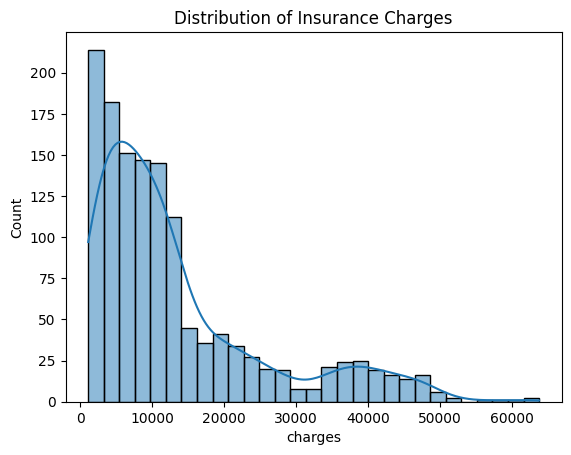

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of charges
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

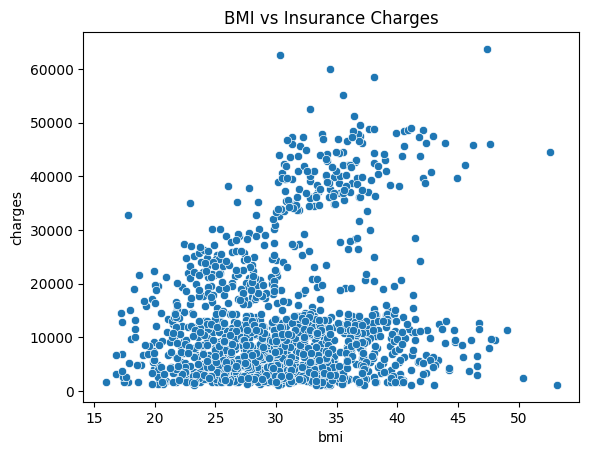

In [10]:
# BMI vs Charges
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("BMI vs Insurance Charges")
plt.show()

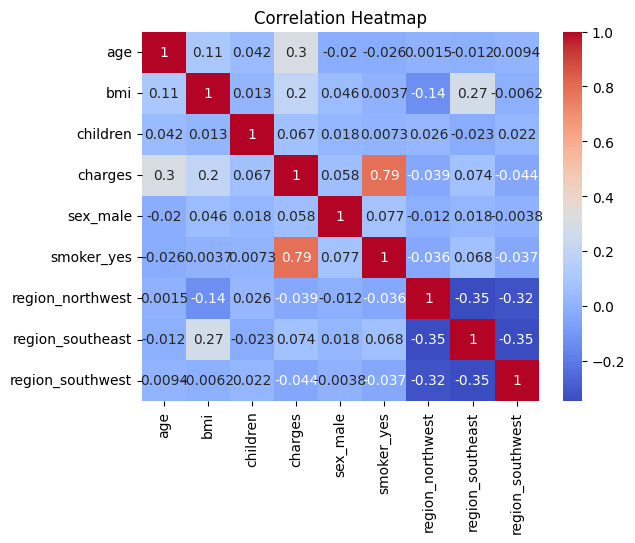

In [11]:
# Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


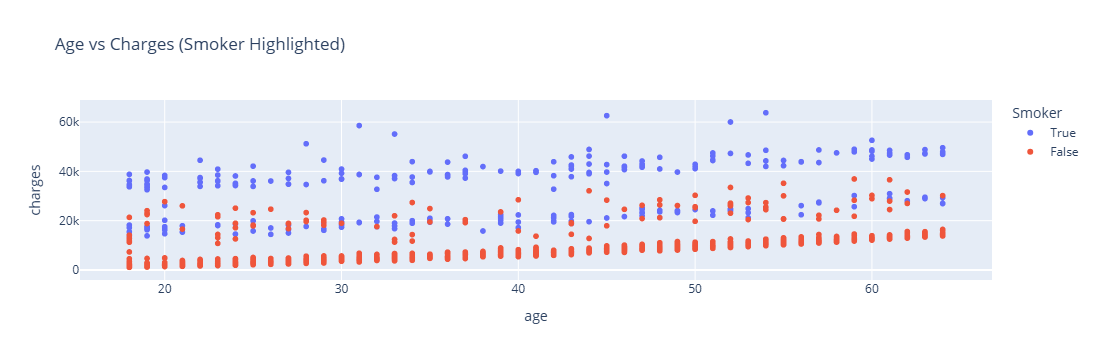

In [12]:
### Interactive Charts (Plotly)
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(df, x='age', y='charges', color='smoker_yes',
                 title="Age vs Charges (Smoker Highlighted)",
                 labels={'smoker_yes': 'Smoker'})
fig.show()

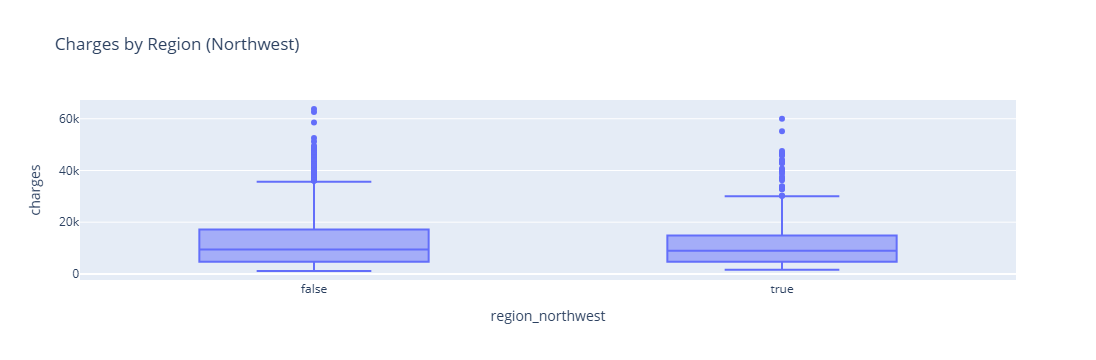

In [13]:
# Interactive box plot
fig = px.box(df, x='region_northwest', y='charges',
             title="Charges by Region (Northwest)")
fig.show()


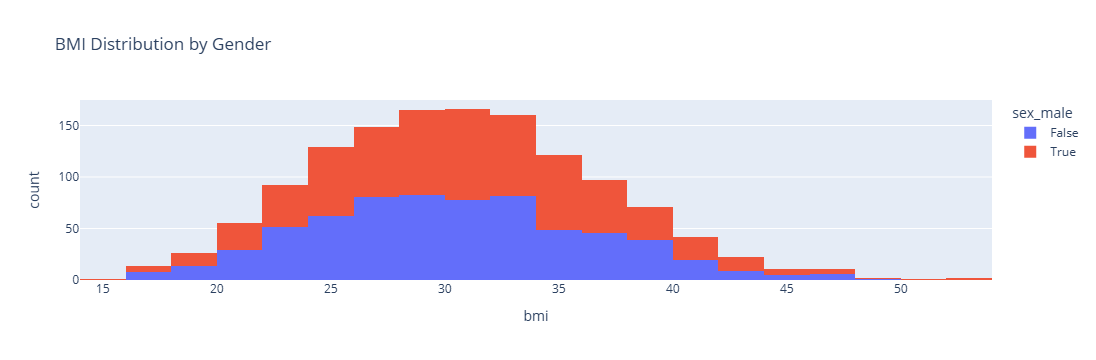

In [14]:
# Interactive histogram
fig = px.histogram(df, x='bmi', nbins=30, color='sex_male',
                   title="BMI Distribution by Gender")
fig.show()

#### Machine Learning Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### Model Evaluation

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute MSE, then take square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)


R2 Score: 0.8069287081198012
RMSE: 5956.342894363587


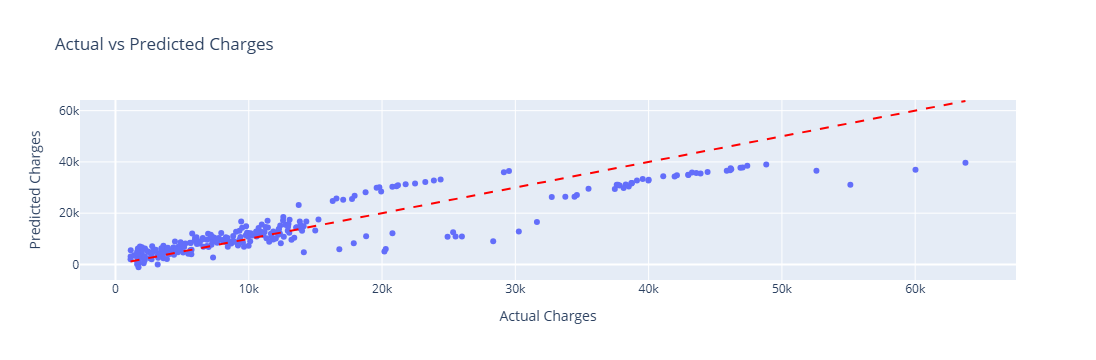

In [18]:
# Interactive Actual vs Predicted
fig = px.scatter(x=y_test, y=y_pred,
                 labels={'x': 'Actual Charges', 'y': 'Predicted Charges'},
                 title="Actual vs Predicted Charges")
fig.add_shape(type='line', x0=y_test.min(), y0=y_test.min(),
              x1=y_test.max(), y1=y_test.max(),
              line=dict(color='red', dash='dash'))
fig.show()